<a href="https://colab.research.google.com/github/JoanWaweru/Sentiment-Analysis-for-Code-Switched-Language/blob/main/Code-Switched%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install datasets
!pip install numpy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.7 MB/s 
     |████████████████████████████████| 182 kB 98.3 MB/s 
     |████████████████████████████████| 7.6 MB 86.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 452 kB 4.7 MB/s 
     |████████████████████████████████| 212 kB 94.5 MB/s 
     |████████████████████████████████| 132 kB 91.0 MB/s 
     |████████████████████████████████| 127 kB 75.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
uploaded = files.upload()

Saving processed_batch.csv to processed_batch.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving safaricomDataset.csv to safaricomDataset.csv


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv('processed_batch.csv')

In [5]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['Classification'])
 
# printing label
label

# removing the column 'Classification' from data
# as it is of no use now.
df.drop("Classification", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Classification'
df["Classification"] = label
 
# printing Dataframe
df

,Unnamed: 0,Date,User,Tweet,Confidence,Classification
0,0,2022-10-23 23:37:49+00:00,samsabwa,@waxspell @Safaricom_Care @AskPayPal sponyo al...,0.471398,0
1,1,2022-10-23 23:36:25+00:00,zac124,@Safaricom_Care @SafaricomPLC \r\n\r\nwhat are...,0.697890,0
2,2,2022-10-23 23:19:35+00:00,tonui_ke,@Safaricom_Care check DM,0.602789,1
3,3,2022-10-23 22:14:19+00:00,Safaricom_Care,"@martinkanini Hello Martin, please DM https://...",0.595557,1
4,4,2022-10-23 22:01:01+00:00,martinkanini,@Safaricom_Care am getting some OTP several of...,0.414787,1
...,...,...,...,...,...,...
886,894,2022-10-22 12:23:09+00:00,Safaricom_Care,"@machelmitoko Hi Samora, please clarify the se...",0.450029,1
887,895,2022-10-22 12:21:47+00:00,cheisly_a,@Safaricom_Care @Macha_Icon 😹😹😹😹😹,0.707040,1
888,896,2022-10-22 12:20:11+00:00,lawiarome,Good afternoon @Safaricom_Care as you celebrat...,0.743602,1
889,897,2022-10-22 12:18:45+00:00,Safaricom_Care,"@iamNelimaBev @iamNelimaBev : Hello, we are on...",0.509154,0


0    449
1    442
Name: Classification, dtype: int64


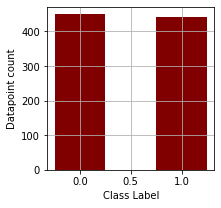

In [6]:
label_counts = df['Classification'].value_counts()
print(label_counts)
plt.figure(figsize=(3,3))
plt.bar(label_counts.index, label_counts,color ='maroon',
        width = 0.5)
plt.xlabel("Class Label")
plt.ylabel("Datapoint count")
plt.grid()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = df.Tweet.values
y = df.Classification.values

X_train, X_val, y_train, y_val =\
    train_test_split(X, y, test_size=0.1, random_state=2020)

In [8]:
# Load test data
test_data = pd.read_csv('safaricomDataset.csv')

# Keep important columns
test_data = test_data[['Tweet']]

# Display 5 samples from the test data
test_data.sample(5)

,Tweet
3291,@Safaricom_Care #Tuinuane #CustomerObsessionMo...
2130,@Smartsenior001 @Moz_G_ke @Safaricom_Care Labd...
1492,@mainCollins2 Hi Collins. Received. We will no...
1905,@Safaricom_Care msinisahau #Tuinuane #Customer...
666,@Safaricom_Care guys please am tired of waitin...


In [9]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: A100-SXM4-40GB


In [10]:
import re
import nltk
# Uncomment to download "stopwords"
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_preprocessing(s):
    s = s.lower()
    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    
    return s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text
X_train_preprocessed = np.array([text_preprocessing(text) for text in X_train])
X_val_preprocessed = np.array([text_preprocessing(text) for text in X_val])

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessed)
X_val_tfidf = tf_idf.transform(X_val_preprocessed)

CPU times: user 996 ms, sys: 50.3 ms, total: 1.05 s
Wall time: 1.06 s


In [12]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

In [13]:
#from sklearn.naive_bayes import MultinomialNB

#res = pd.Series([get_auc_CV(MultinomialNB(i))
 #                for i in np.arange(1, 10, 0.1)],
  #              index=np.arange(1, 10, 0.1))

#best_alpha = np.round(res.idxmax(), 2)
#print('Best alpha: ', best_alpha)

#plt.plot(res)
#plt.title('AUC vs. Alpha')
#plt.xlabel('Alpha')
#plt.ylabel('AUC')
#plt.show()

In [14]:
#from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.8279
Accuracy: 70.00%


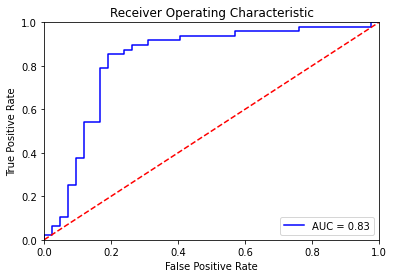

In [15]:
# Compute predicted probabilities
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB(alpha=1.8)
nb_model.fit(X_train_tfidf, y_train)
probs = nb_model.predict_proba(X_val_tfidf)

# Evaluate the classifier
evaluate_roc(probs, y_val)

In [16]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
def text_preprocessing(text):
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [18]:
# Print sentence 0
print('Original: ', X[1])
print('Processed: ', text_preprocessing(X[1]))

Original:  @Safaricom_Care @SafaricomPLC 

what are official roaming rates: 

1) making "UK-to-Kenya" calls &amp; sms's? 

2) receiving "Kenya-to-UK" calls &amp; sms's?

As of 23.10.22 Safaricom is charging: 
Ksh. 45/- UK-to-Kenya per minute calls
Ksh. 10/- UK-to-Kenya sms 

source: screenshots
Processed:  what are official roaming rates: 1) making "UK-to-Kenya" calls & sms's? 2) receiving "Kenya-to-UK" calls & sms's? As of 23.10.22 Safaricom is charging: Ksh. 45/- UK-to-Kenya per minute calls Ksh. 10/- UK-to-Kenya sms source: screenshots


In [19]:
from transformers import DistilBertTokenizer

# Load the BERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [20]:
# Concatenate train data and test data
all_tweets = np.concatenate([df.Tweet.values, test_data.Tweet.values])

# Encode our concatenated data
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in all_tweets]

# Find the maximum length
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  168


In [21]:
# Specify `MAX_LEN`
MAX_LEN = 84

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  @waxspell @Safaricom_Care @AskPayPal sponyo alifinya maziwa akareverse
Token IDs:  [101, 32650, 16131, 10133, 12134, 29359, 10679, 10824, 11282, 11037, 97951, 23433, 10341, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tokenizing data...


/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [22]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [23]:
%%time
import torch
import torch.nn as nn
from transformers import DistilBertModel

# Create the DistilBertClassfier class
class DistilBertClassifier(nn.Module):
    
    def __init__(self, freeze_bert=False):

        super(DistilBertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = DistilBertModel.from_pretrained('distilbert-base-multilingual-cased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 38.8 ms, sys: 0 ns, total: 38.8 ms
Wall time: 38.4 ms


In [24]:
DistilBertClassifier

__main__.DistilBertClassifier

In [25]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = DistilBertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [26]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [27]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)

Downloading:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warni

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.592547   |     -      |     -     |   4.76   
   1    |   25    |   0.647102   |     -      |     -     |   0.31   
----------------------------------------------------------------------
   1    |    -    |   0.603038   |  0.415289  |   77.72   |   5.13   
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   20    |   0.416699   |     -      |     -     |   1.34   
   2    |   25    |   0.535064   |     -      |     -     |   0.30   
----------------------------------------------------------------------
   2    |    -    |   0.439461   |  0.367976  |   81.33   |   1.69   
----------------------------------------------------------------

In [28]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

AUC: 0.9221
Accuracy: 81.11%


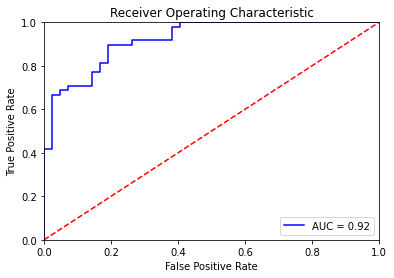

In [29]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, val_dataloader)

# Evaluate the Bert classifier
evaluate_roc(probs, y_val)

In [30]:
# Concatenate the train set and the validation set
full_train_data = torch.utils.data.ConcatDataset([train_data, val_data])
full_train_sampler = RandomSampler(full_train_data)
full_train_dataloader = DataLoader(full_train_data, sampler=full_train_sampler, batch_size=32)

# Train the Bert Classifier on the entire training data
set_seed(42)
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, full_train_dataloader, epochs=2)

Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warni

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.589714   |     -      |     -     |   1.35   
   1    |   27    |   0.457951   |     -      |     -     |   0.44   
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   20    |   0.399116   |     -      |     -     |   1.34   
   2    |   27    |   0.393252   |     -      |     -     |   0.44   
----------------------------------------------------------------------


Training complete!


In [31]:
test_data.sample(5)

,Tweet
1501,@Safaricom_Care Check dm @Safaricom_Care
2586,@Safaricom_Care *126#\r\nLipa na bonga points ...
2653,@Safaricom_Care #CustomerObsessionMonth *126#...
1055,@Safaricom_Care @Safaricom_Care kwani huku mna...
705,@Safaricom_Care Mpesa reversal...have sent mon...


In [32]:
# Run `preprocessing_for_bert` on the test set
print('Tokenizing data...')
test_inputs, test_masks = preprocessing_for_bert(test_data.Tweet)

# Create the DataLoader for our test set
test_dataset = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=32)

Tokenizing data...


/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [33]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, test_dataloader)

# Get predictions from the probabilities
threshold = 0.9
preds = np.where(probs[:, 1] > threshold, 1, 0)

# Number of tweets predicted non-negative
print("Number of predicted positive tweets: ", preds.sum())

Number of predicted positive tweets:  703


In [34]:
output = test_data[preds==0]
output

,Tweet
0,@waxspell @Safaricom_Care @AskPayPal sponyo al...
1,@Safaricom_Care @SafaricomPLC \r\n\r\nwhat are...
3,"@martinkanini Hello Martin, please DM https://..."
4,@Safaricom_Care am getting some OTP several of...
7,"@c_hir_i Hello, you can view detailed data usa..."
...,...
4995,@Safaricom_Care They were so generous\r\n#Tuin...
4996,@Safaricom_Care Nyi maumbwa hamtanijenga hiyo ...
4997,"@muriukiabraham Hey Abraham, request your mum..."
4998,@Safaricom_Care It was great and I was satisfi...


In [36]:
df3=pd.read_csv('safaricomDataset.csv')


# Run `preprocessing_for_bert` on the test set
print('Tokenizing data...')
test3_inputs, test3_masks = preprocessing_for_bert(df3.Tweet)

# Create the DataLoader for our test set
test3_dataset = TensorDataset(test3_inputs, test3_masks)
test3_sampler = SequentialSampler(test3_dataset)
test3_dataloader = DataLoader(test3_dataset, sampler=test3_sampler, batch_size=32)
# Compute predicted probabilities on the test set
probs_test3 = bert_predict(bert_classifier, test3_dataloader)


# Get predictions from the probabilities
threshold = 0.9
preds_test3 = np.where(probs_test3[:, 1] > threshold, 1, 0)
# Number of tweets predicted non-negative
print("Number of predicted positive tweets: ", preds_test3.sum())

Tokenizing data...


/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Number of predicted positive tweets:  703


In [37]:
output3 = df3[preds_test3==0]
output3.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-10-23 23:37:49+00:00,samsabwa,@waxspell @Safaricom_Care @AskPayPal sponyo al...
1,1,2022-10-23 23:36:25+00:00,zac124,@Safaricom_Care @SafaricomPLC \r\n\r\nwhat are...
3,3,2022-10-23 22:14:19+00:00,Safaricom_Care,"@martinkanini Hello Martin, please DM https://..."
4,4,2022-10-23 22:01:01+00:00,martinkanini,@Safaricom_Care am getting some OTP several of...
7,7,2022-10-23 21:20:20+00:00,Safaricom_Care,"@c_hir_i Hello, you can view detailed data usa..."


In [38]:
output3.shape

(4297, 4)

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
torch.save(bert_classifier, '/content/drive/My Drive/Project_Dataset' + '/'+ 'distilBertModel' + '.bin')

In [ ]:
#saving the model into a pickle file
# import pickle
# with open('safaricomModel.pkl', 'wb') as fid:
#     pickle.dump(bert_classifier, fid)
# pickle.dump(bert_classifier, open('transform.pkl', 'wb'))
# fid.close()

In [ ]:
# Open the pickle file and load its content
# with open('safaricomModel.pkl', 'rb') as file:
#   safaricomModel = pickle.load(file)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import shutil
# shutil.copy("safaricomModel.pkl","/content/drive/MyDrive/")
# shutil.copy("transform.pkl","/content/drive/MyDrive/")

In [42]:
torch.save(bert_classifier, '/content/drive/My Drive/Project_Dataset' + '/'+ 'distilBertModel' + '.bin')

In [ ]:
# import pickle

# # Load the pickle file
# with open('safaricomModel.pkl', 'rb') as f:
#   data = pickle.load(f)

# # Print the contents of the pickle file
# print(data)


In [43]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from flask_ngrok import run_with_ngrok

In [48]:
!pip install fastapi nest-asyncio pyngrok uvicorn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install scrape

In [ ]:
# from fastapi import FastAPI, Request
# from fastapi.responses import HTMLResponse
# from fastapi.staticfiles import StaticFiles
# from fastapi.templating import Jinja2Templates
# import nest_asyncio
# from pyngrok import ngrok
# import uvicorn

# app = FastAPI()
# app.mount("/static", StaticFiles(directory="static"), name="static")
# templates = Jinja2Templates(directory="templates")
# BERTClassifier = pickle.load(open('safaricomModel.pkl', 'rb'))
# cv = pickle.load(open('transform.pkl','rb'))

# @app.get("/", response_class=HTMLResponse)
# async def get(request: Request):
#     return templates.TemplateResponse("index.html", {"request": request})